# Stock API Demo - Price Series Visualization

This notebook demonstrates the `jqsys.fin.Stock` API with basic price series plotting.

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from jqsys.fin import Stock

# Configure matplotlib for better-looking plots
plt.style.use("seaborn-v0_8-darkgrid")
%matplotlib inline

## Create Stock Instance

Create a Stock instance directly using a stock code (4 or 5 digits).

In [2]:
# Use the first result or specify a code directly
stock = Stock("7203")  # Toyota Motor

print(stock)
print(f"\nBase code: {stock.base_code}")
print(f"Market: {stock.market_code}")
print(f"Sector: {stock.sector17_code}")

Stock(code='72030' (トヨタ自動車, 0111))

Base code: 7203
Market: 0111
Sector: 6


## Fetch Price History

Retrieve historical price data with optional date filtering and adjustment.

In [3]:
# Get full price history with adjustments
df = stock.get_price_history(adjust="replace")

print(f"Retrieved {len(df)} days of price data")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print("\nLatest 5 records:")
print(df.tail(5))

Retrieved 135 days of price data
Date range: 2024-12-20 to 2025-07-11

Latest 5 records:
shape: (5, 11)
┌───────┬────────────┬────────┬────────┬───┬──────────────┬──────────────┬───────────┬─────────────┐
│ code  ┆ date       ┆ open   ┆ high   ┆ … ┆ turnover_val ┆ adjustment_f ┆ adj_close ┆ processed_a │
│ ---   ┆ ---        ┆ ---    ┆ ---    ┆   ┆ ue           ┆ actor        ┆ ---       ┆ t           │
│ str   ┆ date       ┆ f64    ┆ f64    ┆   ┆ ---          ┆ ---          ┆ f64       ┆ ---         │
│       ┆            ┆        ┆        ┆   ┆ f64          ┆ f64          ┆           ┆ str         │
╞═══════╪════════════╪════════╪════════╪═══╪══════════════╪══════════════╪═══════════╪═════════════╡
│ 72030 ┆ 2025-07-07 ┆ 2500.0 ┆ 2502.0 ┆ … ┆ 5.1133e10    ┆ 1.0          ┆ 2453.5    ┆ 2025-10-05T │
│       ┆            ┆        ┆        ┆   ┆              ┆              ┆           ┆ 06:28:56.96 │
│       ┆            ┆        ┆        ┆   ┆              ┆              ┆           ┆ 5

## Plot Close Price Series

Visualize the closing price over time.

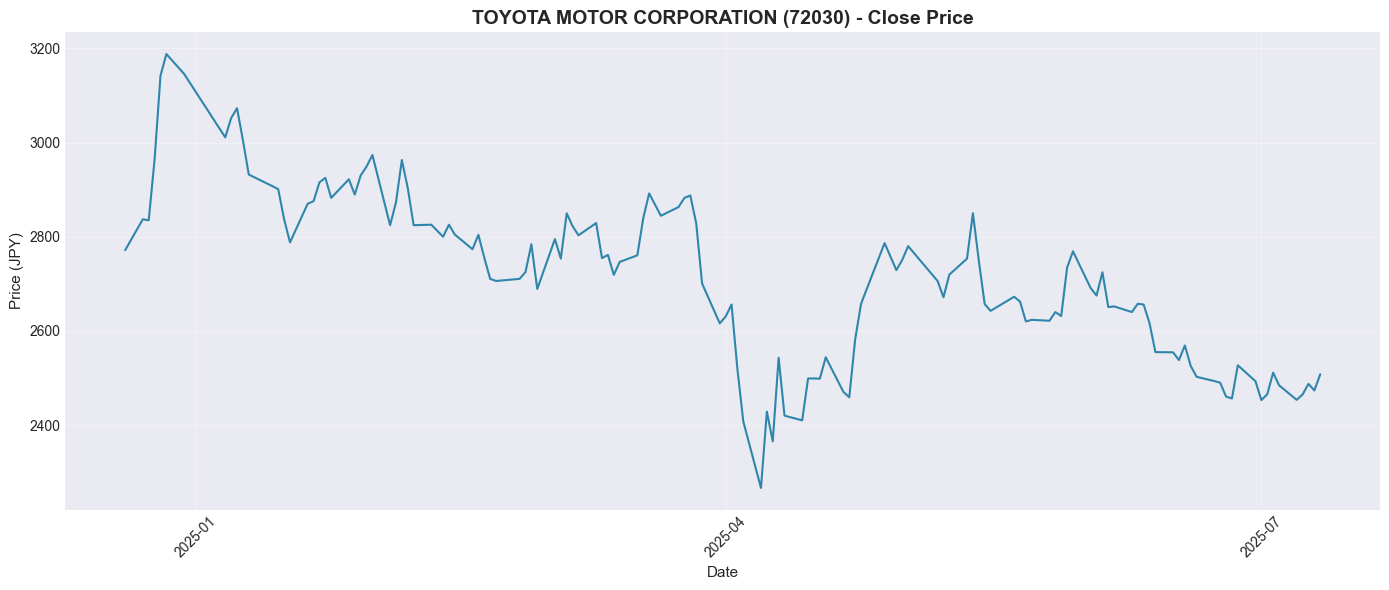

In [4]:
# Convert Polars DataFrame to pandas for easy plotting
pdf = df.to_pandas()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(pdf["date"], pdf["close"], linewidth=1.5, color="#2E86AB")
ax.set_title(
    f"{stock.company_name_english} ({stock.code}) - Close Price", fontsize=14, fontweight="bold"
)
ax.set_xlabel("Date", fontsize=11)
ax.set_ylabel("Price (JPY)", fontsize=11)
ax.grid(True, alpha=0.3)

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Plot Volume Series

Visualize trading volume over time.

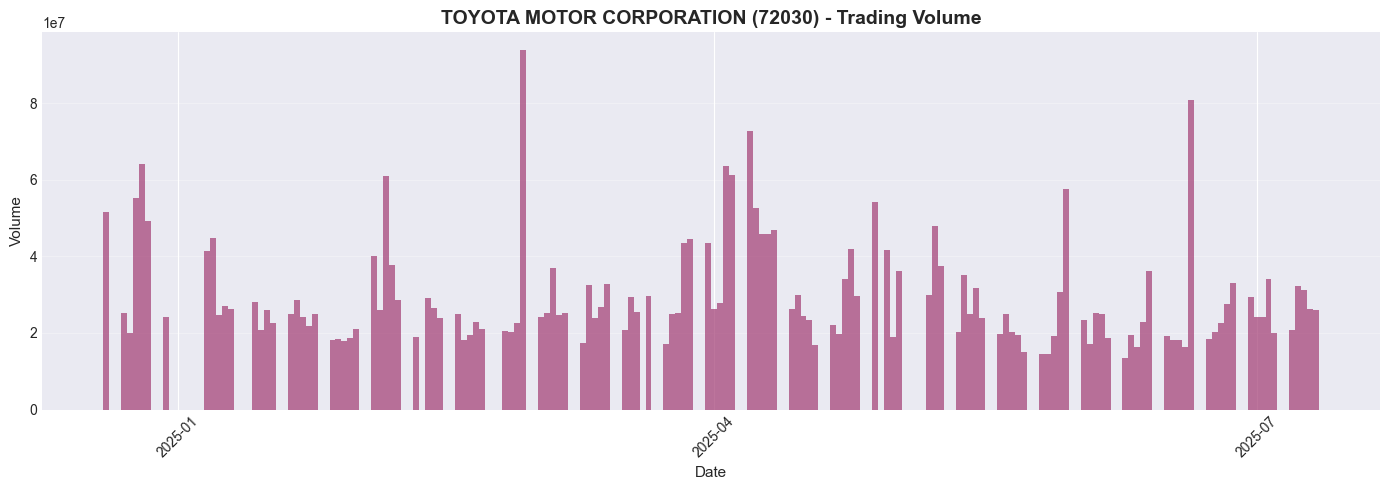

In [5]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(pdf["date"], pdf["volume"], width=1.0, color="#A23B72", alpha=0.7)
ax.set_title(
    f"{stock.company_name_english} ({stock.code}) - Trading Volume", fontsize=14, fontweight="bold"
)
ax.set_xlabel("Date", fontsize=11)
ax.set_ylabel("Volume", fontsize=11)
ax.grid(True, alpha=0.3, axis="y")

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Plot Multiple Series

Compare open, high, low, and close prices on a single chart.

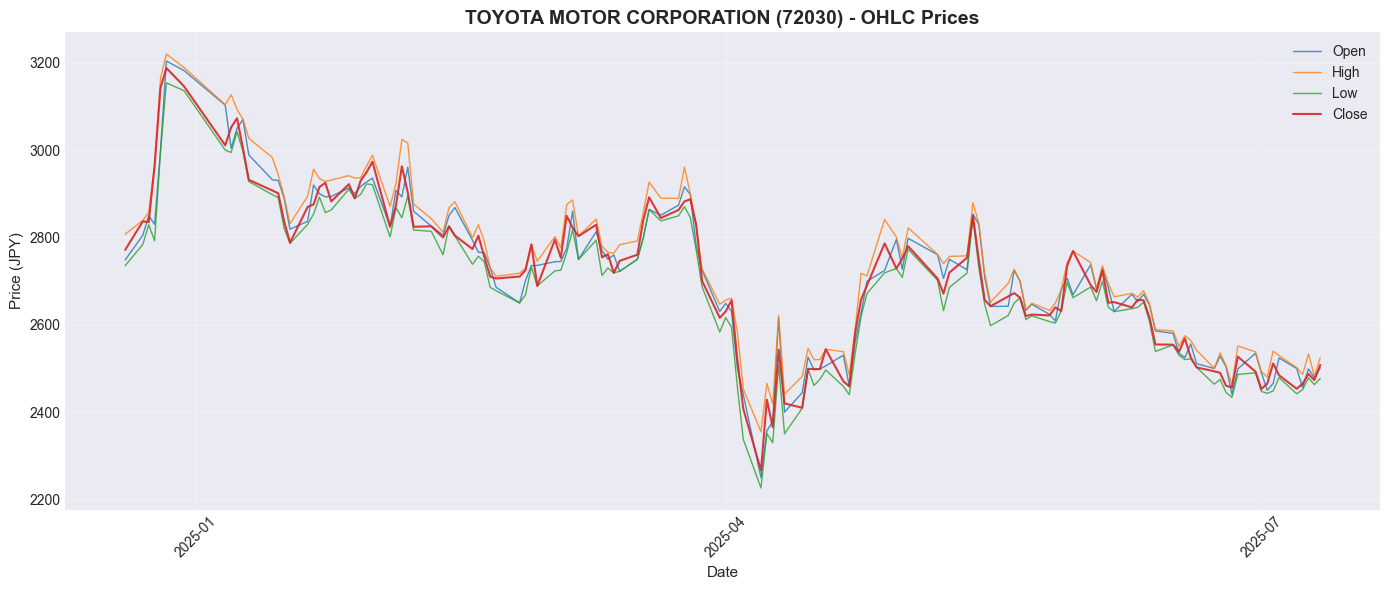

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(pdf["date"], pdf["open"], label="Open", linewidth=1, alpha=0.8)
ax.plot(pdf["date"], pdf["high"], label="High", linewidth=1, alpha=0.8)
ax.plot(pdf["date"], pdf["low"], label="Low", linewidth=1, alpha=0.8)
ax.plot(pdf["date"], pdf["close"], label="Close", linewidth=1.5, alpha=0.9)

ax.set_title(
    f"{stock.company_name_english} ({stock.code}) - OHLC Prices", fontsize=14, fontweight="bold"
)
ax.set_xlabel("Date", fontsize=11)
ax.set_ylabel("Price (JPY)", fontsize=11)
ax.legend(loc="best", framealpha=0.9)
ax.grid(True, alpha=0.3)

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Use Convenience Methods

The Stock API provides convenient methods to directly retrieve specific series.

In [7]:
# Get adjusted close series
close_series = stock.close_series(adjusted=True)
print("Close series (last 10 values):")
print(close_series.tail(10))

# Get raw (unadjusted) volume series
volume_series = stock.volume_series(adjusted=False)
print("\nVolume series (last 10 values):")
print(volume_series.tail(10))

Close series (last 10 values):
shape: (10,)
Series: 'close' [f64]
[
	2493.0
	2453.0
	2465.5
	2511.5
	2484.5
	2453.5
	2465.0
	2487.5
	2473.5
	2508.0
]

Volume series (last 10 values):
shape: (10,)
Series: 'volume' [i64]
[
	29284500
	24298200
	24281200
	34098600
	19876900
	20788700
	32336400
	31320400
	26257000
	25922800
]


## Check Adjustment Events

Identify dates where corporate actions (splits, dividends) affected prices.

In [8]:
events = stock.adjustment_events()
print(f"Found {len(events)} adjustment events:")
if not events.is_empty():
    print(events)
else:
    print("No adjustment events in this period")

Found 0 adjustment events:
No adjustment events in this period


## Date Range Filtering

Retrieve price data for a specific date range.

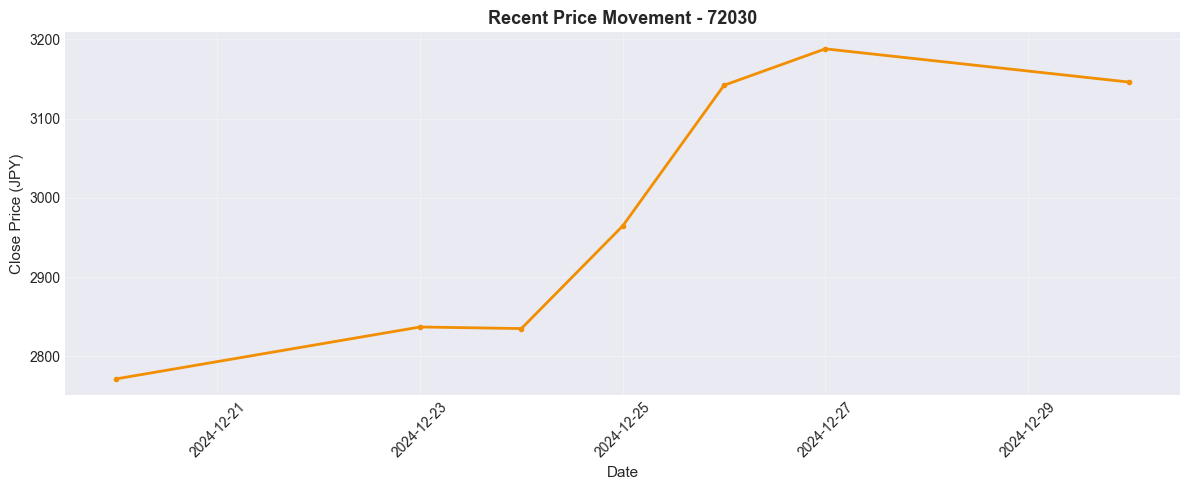

In [9]:
# Get last 30 days (approximate)
recent_df = stock.get_price_history(
    start_date="2024-01-01", end_date="2024-12-31", adjust="replace"
)

if not recent_df.is_empty():
    recent_pdf = recent_df.to_pandas()

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(
        recent_pdf["date"],
        recent_pdf["close"],
        linewidth=2,
        color="#F18F01",
        marker="o",
        markersize=3,
    )
    ax.set_title(f"Recent Price Movement - {stock.code}", fontsize=13, fontweight="bold")
    ax.set_xlabel("Date", fontsize=11)
    ax.set_ylabel("Close Price (JPY)", fontsize=11)
    ax.grid(True, alpha=0.3)

    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("No data available for the specified date range")